In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os



In [3]:
data_path = "D:\\prema\\premagit\\Detecting_spam_model\\data\\raw\\spam.csv"
df = pd.read_csv(data_path, encoding='latin-1') 
df.head()



,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
print("Shape:", df.shape)
print("Columns:", df.columns)
df.info()
df.describe()



Shape: (5572, 5)
Columns: Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [5]:
df = df[['v1', 'v2']]
df.columns = ['label', 'message']



label
ham     4825
spam     747
Name: count, dtype: int64


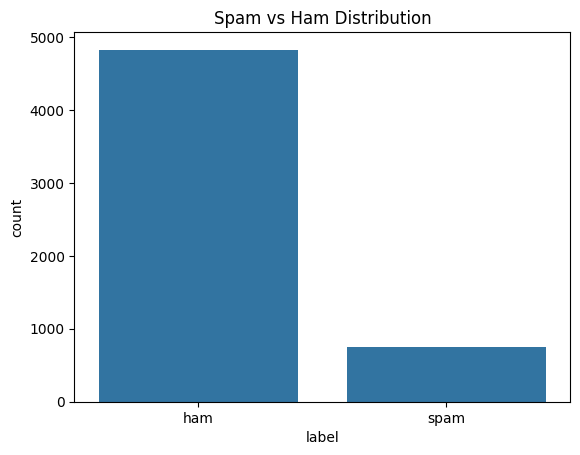

In [6]:
print(df['label'].value_counts())
sns.countplot(x='label', data=df)
plt.title("Spam vs Ham Distribution")
plt.show()



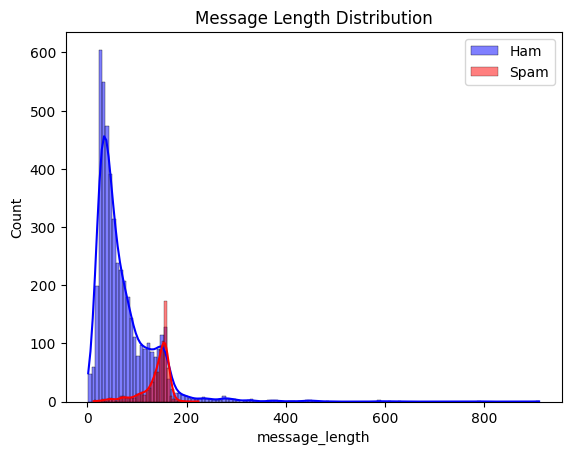

Missing values: label             0
message           0
message_length    0
dtype: int64


In [11]:
df['message_length'] = df['message'].apply(len)
sns.histplot(df[df['label'] == 'ham']['message_length'], color='blue', label='Ham', kde=True)
sns.histplot(df[df['label'] == 'spam']['message_length'], color='red', label='Spam', kde=True)
plt.legend()
plt.title("Message Length Distribution")
plt.show()

print("Missing values:", df.isnull().sum())

In [8]:

processed_path = "../data/processed/spam_clean.csv"
os.makedirs(os.path.dirname(processed_path), exist_ok=True)
df.to_csv(processed_path, index=False)
print(f"✅ Cleaned dataset saved to {processed_path}")

✅ Cleaned dataset saved to ../data/processed/spam_clean.csv
